# GLMの応用範囲を広げろう

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
sed = pd.read_csv("data/data4a.csv")
print(sed.describe().round(2))
print('------------------------')
print(sed.f.value_counts())

           N       y       x
count  100.0  100.00  100.00
mean     8.0    5.08    9.97
std      0.0    2.74    1.09
min      8.0    0.00    7.66
25%      8.0    3.00    9.34
50%      8.0    6.00    9.96
75%      8.0    8.00   10.77
max      8.0    8.00   12.44
------------------------
T    50
C    50
Name: f, dtype: int64


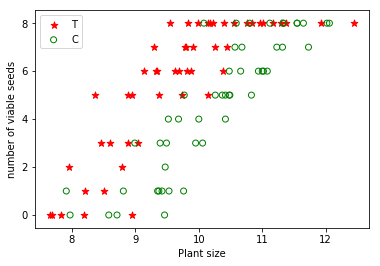

In [3]:
plt.scatter(sed.x[sed.f=='T'], sed.y[sed.f=='T'], label='T', marker='*', s=50, color = 'red')
plt.scatter(sed.x[sed.f=='C'], sed.y[sed.f=='C'], label='C', facecolors='none', edgecolors='green')
plt.legend(loc='upper left')
plt.xlabel('Plant size')
plt.ylabel('number of viable seeds')
plt.show()

## 二項分布
\begin{align}
p(y|N,q) = \begin{pmatrix}{N\\y} \end{pmatrix} q^y(1-q)^{N-y}
\end{align}

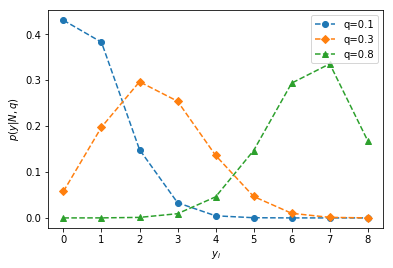

In [5]:
from scipy import stats
y = np.arange(0, 9)
plt.plot(pd.Series(stats.binom.pmf(y, 8, 0.1), index=y), 'o--', label='q=0.1')
plt.plot(pd.Series(stats.binom.pmf(y, 8, 0.3), index=y), 'D--', label='q=0.3')
plt.plot(pd.Series(stats.binom.pmf(y, 8, 0.8), index=y), '^--', label='q=0.8')
plt.legend(loc='upper right')
plt.xlabel('$y_{i}$')
plt.ylabel('$p (y | N, q)$')
plt.show()

## ロジスティク回帰とロジットリンク関数
- ロジスティック回帰では確率分布は二項分布、リンク関数はロジットリンク関数(Logit link function) となるGLM
- ロジスティック関数:
\begin{align}
q_i = logistic(z_i) = \frac{1}{1 + \exp(-z_i)}
\end{align}
- 線形予測子($z_i$):
\begin{equation} z_i = \beta_1 + \beta_2x_i + ... \end{equation}
- ロジット関数(logit function)
\begin{align}
q_i &= logistic(z_i) = \frac{1}{1 + \exp(-z_i)}\\
\frac{1}{q_i} &= 1 + \exp(-z_i)\\
\frac{1-q_i}{q_i} &= \exp(-z_i)\\
z_i &= \log(\frac{q_i}{1-q_i})\\
logit(q_i) &= \log(\frac{q_i}{1-q_i})
\end{align}

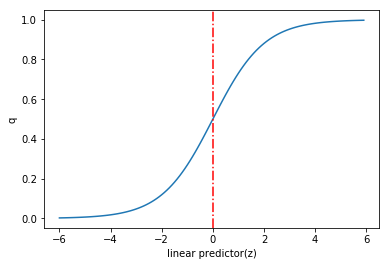

In [13]:
X = np.arange(-6, 6, 0.1)
y = 1/(1+np.exp(-X))
plt.plot(X,y)
plt.xlabel('linear predictor(z)')
plt.ylabel('q')
plt.axvline(x=0, linestyle='dashdot', color='r')
plt.show()

In [16]:
fit = smf.glm(formula='y + I(N-y) ~ x + f', data=sed, family=sm.families.Binomial()).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Sun, 03 Jun 2018   Deviance:                       123.03
Time:                        16:13:33   Pearson chi2:                     109.
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5361      1.414    -13.818      0.000     -22.307     -16.765
f[T.T]         2.0215      0.231      8.740      0.0

In [21]:
formulas = [
    'y + I(N - y) ~ 1',
    'y + I(N - y) ~ x',
    'y + I(N - y) ~ f',
    'y + I(N - y) ~ x + f'
]
fits = []

for formula in formulas:
    fits.append(smf.glm(formula=formula, data=sed, family=sm.families.Binomial()).fit(disp=0))
    
for i in range(len(formulas)):
    print('(AIC) : ' + formulas[i], ':', fits[i].aic)

(AIC) : y + I(N - y) ~ 1 : 644.409341662
(AIC) : y + I(N - y) ~ x : 364.345443284
(AIC) : y + I(N - y) ~ f : 637.759753457
(AIC) : y + I(N - y) ~ x + f : 272.211129285


## 交互作用項の入った線形予測子
\begin{equation}
z_i = logit(q_i) = \beta_1 + \beta_2x_i + \beta_3f_i + \beta_4x_if_i
\end{equation}

In [25]:
# x*f = x + f + x:f
fit = smf.glm(formula='y + I(N-y) ~ x*f', data=sed, family=sm.families.Binomial()).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Sun, 03 Jun 2018   Deviance:                       122.43
Time:                        17:21:25   Pearson chi2:                     109.
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5233      1.886     -9.821      0.000     -22.220     -14.827
f[T.T]        -0.0638      2.704     -0.024      0.9

## オフセット項(offset)

In [35]:
tree = pd.read_csv('data/data4b.csv')

fit = smf.glm(formula='y ~ x', offset=np.log(tree['A']), data=tree, family=sm.families.Poisson()).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.17
Date:                Sun, 03 Jun 2018   Deviance:                       81.608
Time:                        17:48:40   Pearson chi2:                     81.5
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9731      0.045     21.600      0.000       0.885       1.061
x              1.0383      0.078     13.364      0.0

## ガンマ分布

In [76]:
import pyper as pr
r = pr.R(use_numpy='True', use_pandas='True')
r('load("data/gamma.RData")')
dg = pd.DataFrame(r.get('d'))
pg = pd.Series(r.get('p'))
print(pg)
dg = dg.rename(index=str, columns={' x ': 'x', ' y ': 'y'})

b1      -1.0
b2       0.7
theta    3.0
dtype: float64


In [83]:
fit = smf.glm(formula='y ~ np.log(x)', data=dg, family = sm.families.Gamma(link=sm.families.links.log)).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                         0.32508
Method:                          IRLS   Log-Likelihood:                 58.471
Date:                Sun, 03 Jun 2018   Deviance:                       17.251
Time:                        18:09:35   Pearson chi2:                     15.6
No. Iterations:                    18   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0403      0.119     -8.759      0.000      -1.273      -0.808
np.log(x)      0.6832      0.068      9.992      0.0

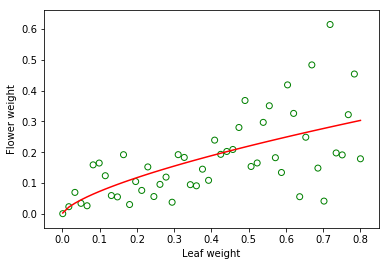

In [90]:
plt.scatter(dg.x, dg.y, facecolors='none', color='green')
plt.plot(dg.x, fit.predict(dg.x), color='r')
plt.xlabel('Leaf weight')
plt.ylabel('Flower weight')
plt.show()